# CS 3851 Algorithms
### Lab 4 – Jan Chudy

## Testing Framework (update)
I rewrote the whole framework from LAB 1 from Python to C++. This resulted into huge efficiency upgrade for sorting algorithm. The problem is, that merge sort is now passing insertion sort (with better time) around n=500, not n=50. I had to redesign generation of different sizes of arrays for testing.

## Function for plotting graphs from generated data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def showGraphs(df):
    rows = []
    for row in df.iterrows():
        index, data = row
        rows.append(data.tolist())
    l = 1
    n = []
    for i in range(1,16):
        l += i**2*2
        n.append(l)
        
    data = {}
    keys = []
    algs = set()
    cases = ["Best Case", "Most Likely Case", "Worst Case"]
    for row in rows:
        key = row[0] + " - " + row[1]
        algs.add(row[0])
        keys.append(key)
        val = [i/1000000 for i in row[2:]]
        data[key] = val
    for alg in algs:
        for case in cases:
            plt.figure()
            title = alg + ' - ' + case
            plt.plot(n, data[title], '-')
            plt.title(title)
            plt.xlabel('Number of elements')
            plt.ylabel('Time (miliseconds)')
            
    plt.figure()
    plt.subplot(3, 1, 1)
    for alg in algs:
        plt.plot(n, data[alg + " - Best Case"], '-', label=alg)
    plt.title("Comparison overview")
    plt.ylabel('Best Case')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.subplot(3, 1, 2)
    for alg in algs:
        plt.plot(n, data[alg + " - Most Likely Case"], '-', label=alg)
    plt.ylabel('Most Likely Case')

    plt.subplot(3, 1, 3)
    for alg in algs:
        plt.plot(n, data[alg + " - Worst Case"], '-', label=alg)
    plt.xlabel('Number of elements')
    plt.ylabel('Worst Case')
    plt.show()

## Load data

In [2]:
# insert, merge and qick sorts comparison
imq = pd.read_csv('../output-data/insert,merge,quick.csv') 
# 2 types of pivot selection
qpiv = pd.read_csv('../output-data/quicksortpivots.csv') 
# merge sort multithread comparison
msm = pd.read_csv('../output-data/mergemultithread.csv') 
# quick sort multithread comparison
qsm = pd.read_csv('../output-data/quickmultithread.csv') 
# multithread qiuck vs merge sorts
qmm = pd.read_csv('../output-data/quickmergemultithread.csv') 

## Insertion, Merge and Quick sort comparison
Tested while rewriting to C++...

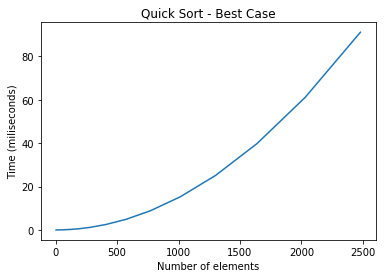

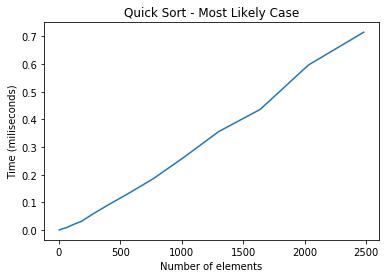

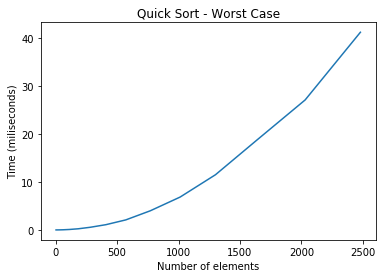

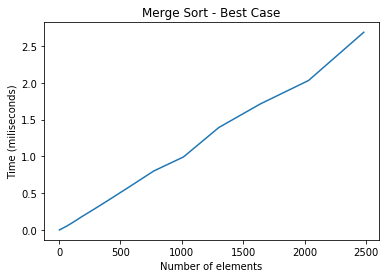

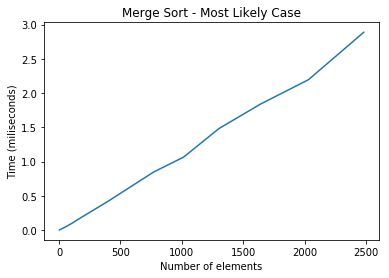

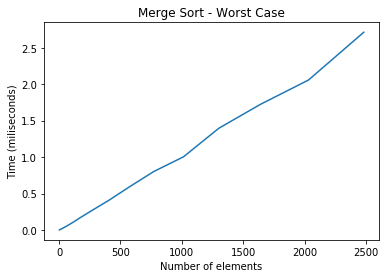

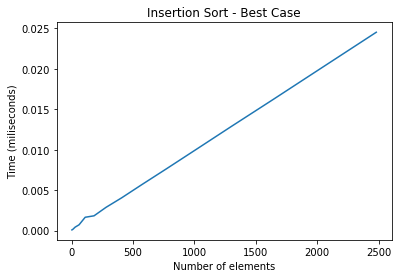

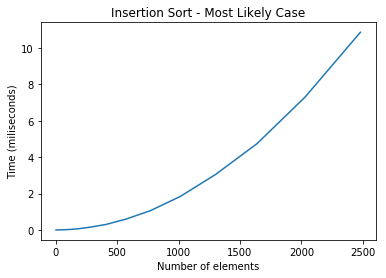

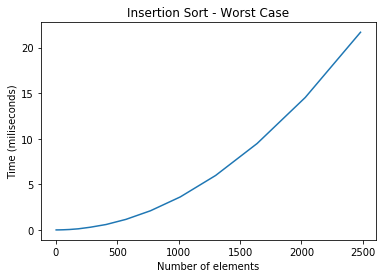

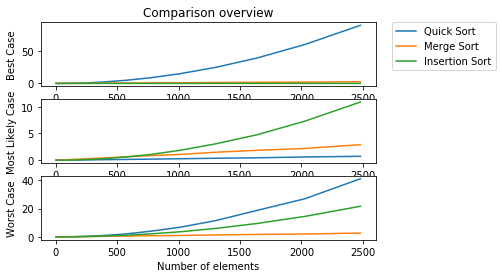

In [3]:
showGraphs(imq)

## Merge sort and Multithread Merge Sort 

I implemented merge sort in a way, that every recursive call is creating a new thread if available. If any threads aren't available I'm running normal recursive call on the current thread. I've tested (besides normal non-multithread mergesort) multithread variations with 2,3 and 4 maximum number of threads. The optimal number of threads used for your program always depends on the processor in your hardware. Of course, creating more and more threads is not efficient, because the operatin system will be trying to switch between them all the time. Therefore you need to have a certain maximum number of threads your algorithm is allowed to use. The same goes for quick sort which we'll see in a moment. That's how I've implemented the "short-circuiting". You shouldn't switch between multithreaded and normal variation of sorting algorithm based on lenght of the partition being sorted, but rather on have a maximum of threads (based on processor) your program can use.

The multithread variations of merge sort are named "Merge Sort (mtN)", where N is number of threads used.

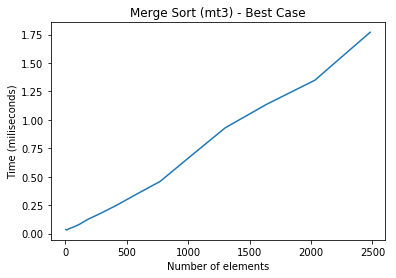

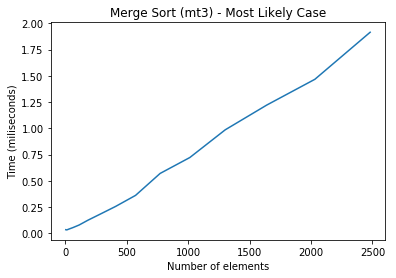

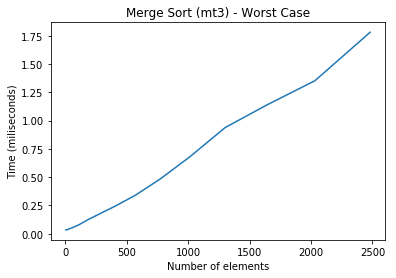

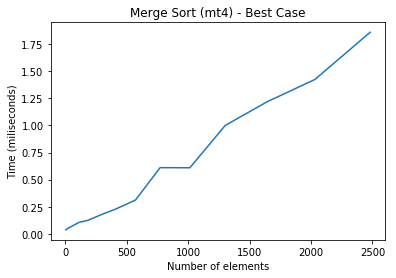

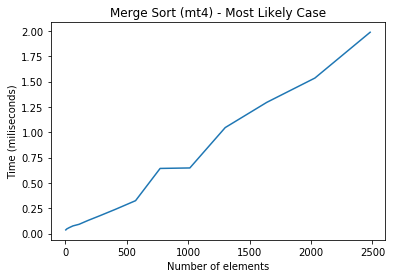

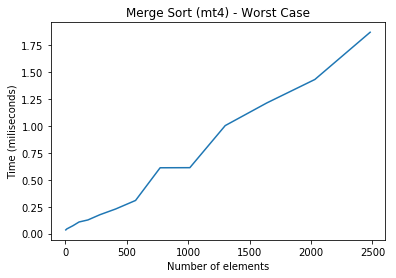

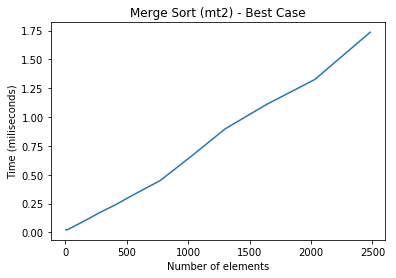

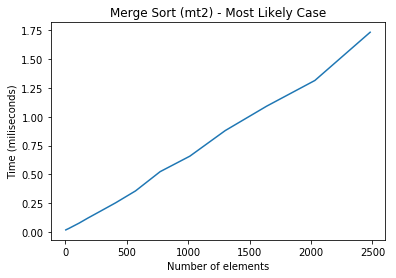

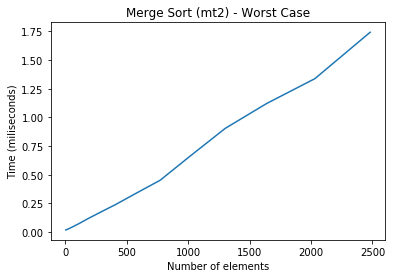

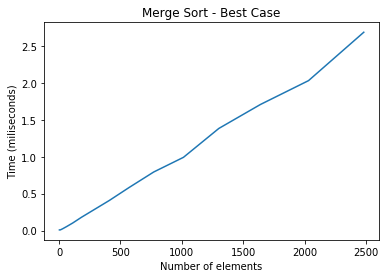

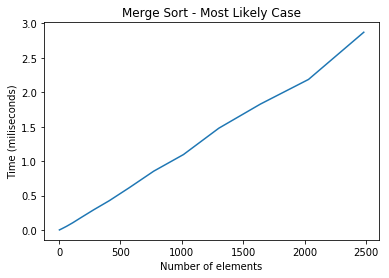

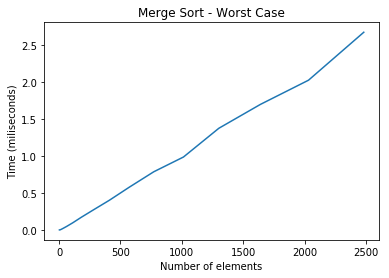

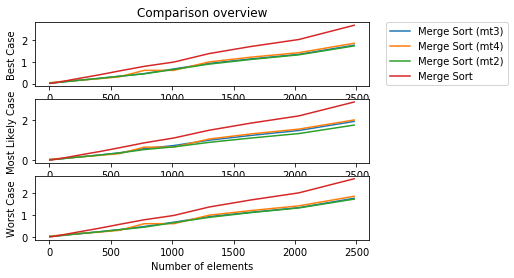

In [4]:
showGraphs(msm)

It shouldn't be a surprise that multithread variation of Merge sort is quicker. It seem, that the 2-threaded merge sort did the best. However, generally, the more of threads the better, unless you exceed your processor maximum.

We have shown in the previous lab (lab 1) that we can create a hybrid algorithm, which is using insertion sort for a shorter partitions. This would also apply for multithreaded verzions.

## Quick Sort pivot selection
The default/classic way to select a pivot is to select the last (or first) element of the string. However that is not optimal way to select a pivot. This way a sorted array is a worst-case scenario for qiuck sort and it's only efficient for a most-likely case scenario.

There are several ways to select a pivot. If you were to select a pivot randomly, a sorted array is not that big of a problem for quick sort now. Worst case (descending order of sorted array) will still be a worst case for quick sort. This pivot selection won't improve the most likely performance, because it's the same as having a random value as the last element.

A very good way to select pivot is to select three random elements and select their middle value. This would also improve the most likely performance. I've implemented a bit different variation. I've selected the middle value from first, middle and last element of the array.

I've tested the classical (last element) pivot selection (pivotType 0) and the mid_of_three pivot selection (pivotType 1) using first, middle and last element of partition being sorted.

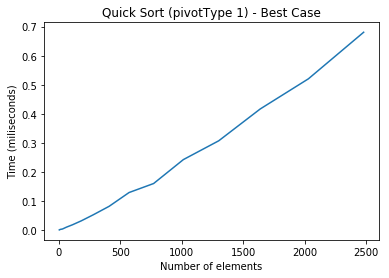

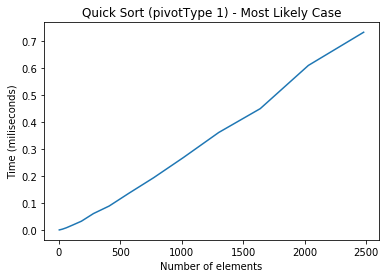

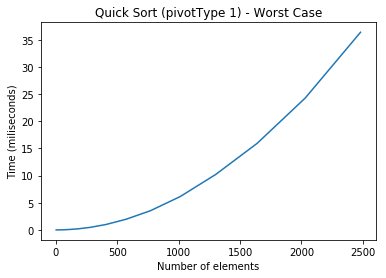

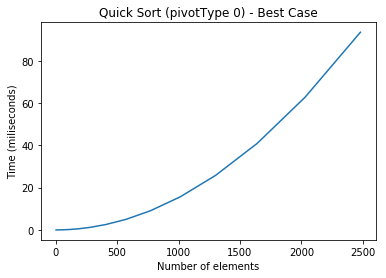

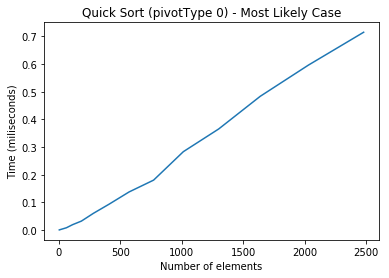

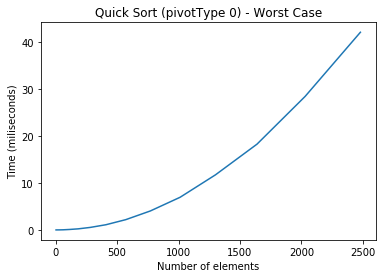

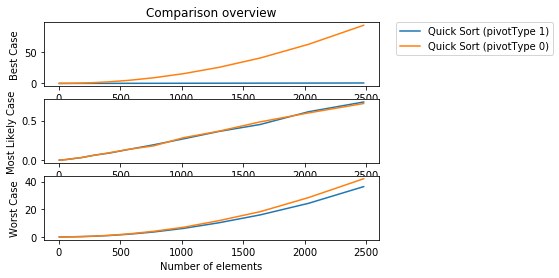

In [5]:
showGraphs(qpiv)

We can see that the most likely case is the same, worst case is slightly better (it's still the worst case, but we're dividing the ammount of work equally), but most importantly, we've floored the best case scenario.

I will be using this type of pivot selection when comparing normal and multithreaded quicksorts.

## Quick sort and Multithread Quick Sort 
Again, similar implementation as merge sort. Creating new threads for every recursive call when we have some free threads available. This way, we can always use threads that finish early in any branch of the recursion. If we have no available threads, we're doint the recursions in the current thread. However, any time a thread frees, we're able to branch out and give it some partitions to sort.

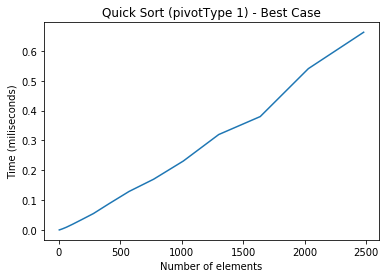

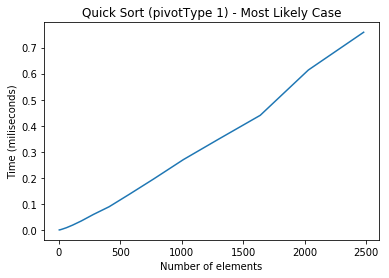

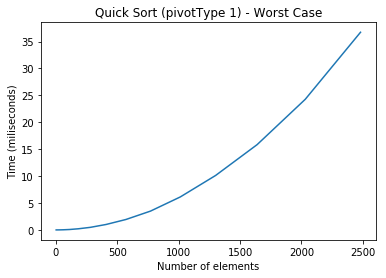

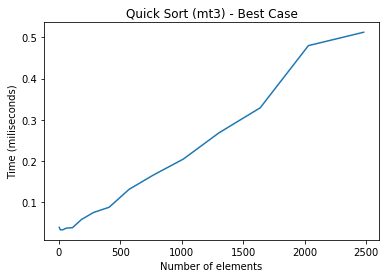

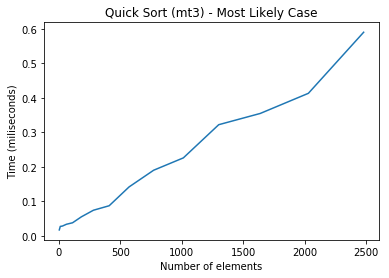

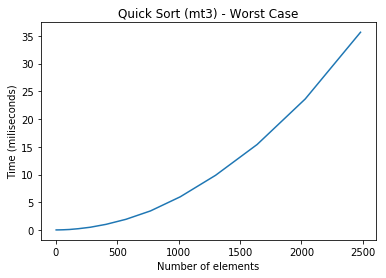

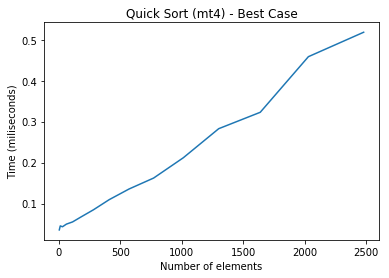

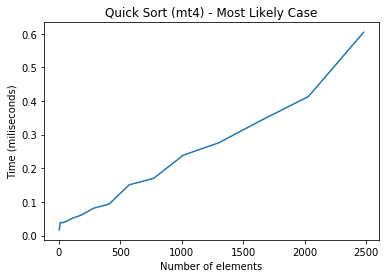

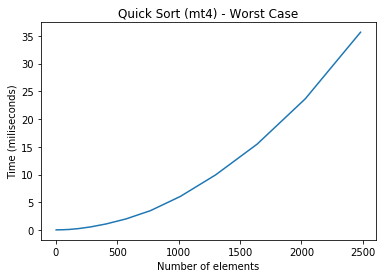

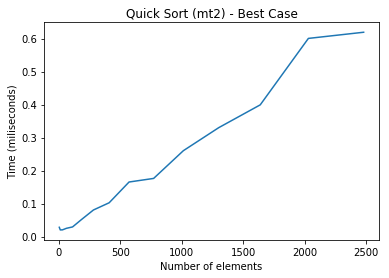

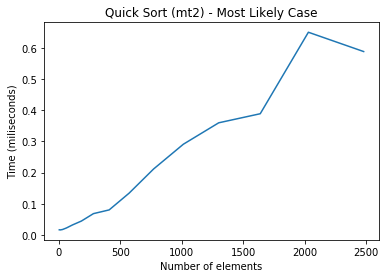

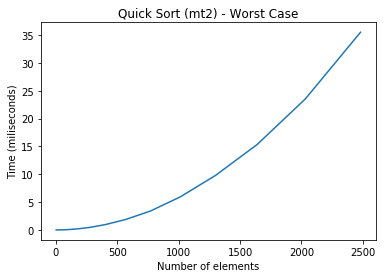

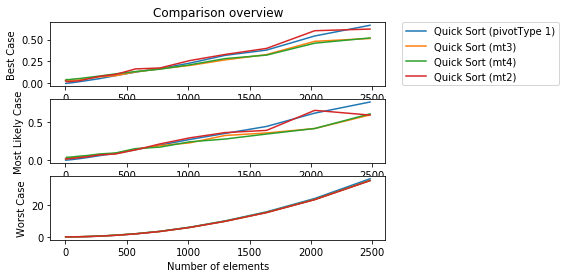

In [6]:
showGraphs(qsm)

The 4-threaded version did the best.

## Multithread Merge Sort vs. Multithread Quick Sort
We know that the multithreaded versions are better. But which one is the best? I've tested multithreaded quick sort and mergesrot, both with 4 threads available.

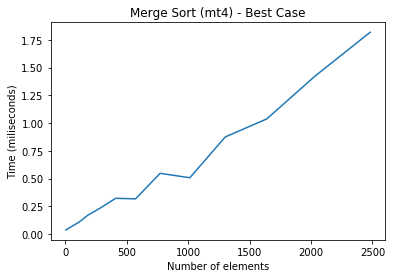

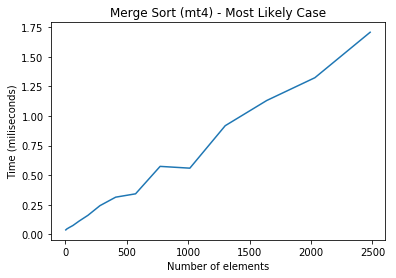

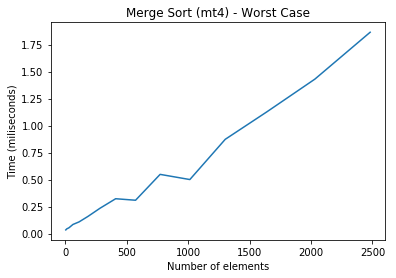

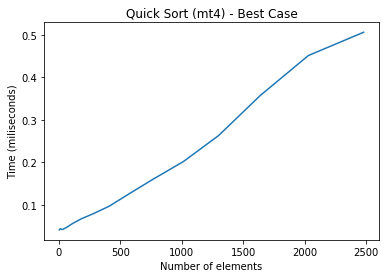

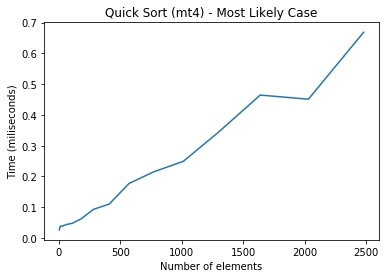

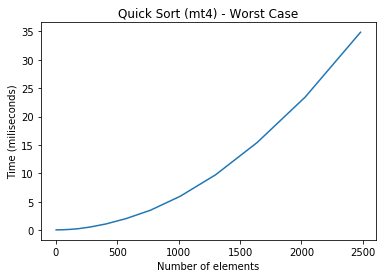

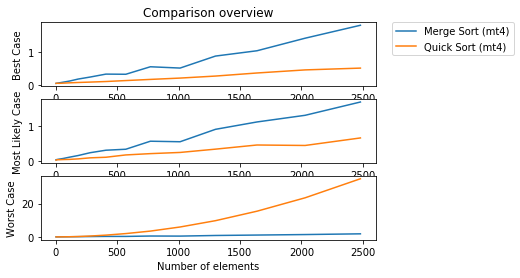

In [7]:
showGraphs(qmm)

Multithreaded quick sort is dominating in best and most likely casses. However in worst case scenario, merge sort is the winner.

I enjoyed programming in C++ once again. However, I've forgotten a lot of things from C++ so it was a challenge. The most time consuming part was to rewrite the whole framework from Python to C++, which wasn't technically part of the assignment, but I wanted to play with the threads in C++ rather than in Python.